In [16]:
import numpy as np
import matplotlib.pyplot as plt

def Poi2(r1,r2,T):
    t=0
    ti=[]
    while t<T:
        r= r1 if t<T/2. else r2
        t += np.random.exponential(1./r)
        ti.append(t)
    return ti[:-1]

def timing2series(ts,T,dt):
    p = np.zeros(int(T/dt),dtype=int)
    ni= np.floor(np.array(ts)/dt)
    p[ni.astype(int)] = 1
    return p

def leakyInt(p,dt,tau):
    delay = 2 #ms
    x = np.arange(0,16*tau,dt)
    kernel = np.concatenate((np.zeros(int(delay/dt)),np.exp(-x/tau)/tau))
    # kernel[0] = 0 # this line may cause two wings unbalanced. 
    result = np.convolve(p,kernel,'full')
    result = result[0:len(p)]
    return result

def alphaF(p,dt,tau):
    x = np.arange(0,16*tau,dt)
    kernel = x/tau*np.exp(-x/tau)/tau
    result = np.convolve(p,kernel,'full')
    result = result[0:len(p)]
    return result

def weightT(T,dt,r1,r2,rpre,tau_pre,tau_post):
    timing_pre = Poi2(rpre/1000.,rpre/1000.,T)
    spiketrain_pre = timing2series(timing_pre,T,dt)
    o_pre = leakyInt(spiketrain_pre,dt,tau_pre)

    timing_post = Poi2(r1/1000.,r2/1000.,T)
    spiketrain_post = timing2series(timing_post,T,dt)
    o_post = leakyInt(spiketrain_post,dt,tau_post)
#
#     delay=[]
#     tpre = np.array(timing_pre)
#     tpost = np.array(timing_post)
#     for ti in tpost[tpost<(T/2)]:
#         for tj in tpre[tpre<(T/2)]:
#             delay.append(ti-tj)
#
    dw = - spiketrain_post * o_pre + spiketrain_pre * o_post 

    w = np.cumsum(dw)
             #
    return w#,delay




In [21]:
T = 3000
dt= .1
rpre=60
r1=50
r2=10

In [22]:
w=[]
delay=[]
for i in range(5000):
#     if i%100==0: print(i)
#     wt,dd = weightT(T,dt,r1=r1,r2=r2,rpre=rpre,tau_pre=15,tau_post=20)
    wt = weightT(T,dt,r1=r1,r2=r2,rpre=rpre,tau_pre=15,tau_post=20)
    w.append(wt)
#     delay+= dd

w = np.mean(w,0)

t = np.arange(0,T,dt)
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
# ax1.plot(t,spiketrain)
# ax2.plot(t,o)
# ax2.set_ylabel('time (ms)')


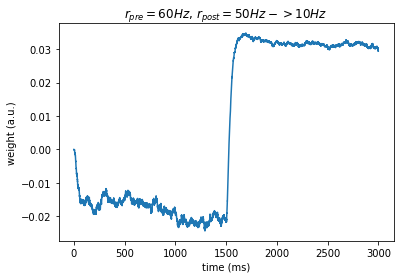

In [23]:
plt.plot(t,w)
plt.xlabel('time (ms)')
plt.ylabel('weight (a.u.)')
plt.title(r'$r_{pre}=%dHz$, $r_{post}=%dHz->%dHz$'%(rpre,r1,r2))
plt.show()


(array([16929509., 16875546.]),
 array([-1500,     0,  1500]),
 <a list of 2 Patch objects>)

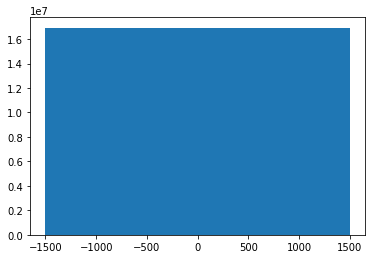

In [14]:
bins = np.arange(-1501,1502,2)
weightx = np.arange(-1500,1501,2)
weightE[] = weightx

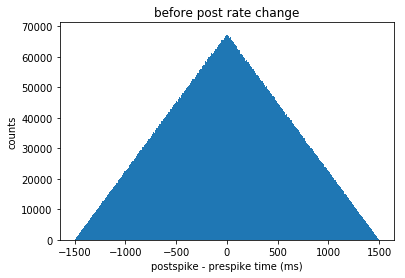

In [12]:
plt.hist(delay,bins=1000)
plt.xlabel('postspike - prespike time (ms)')
plt.ylabel('counts')
plt.title('before post rate change')
# plt.xlim((-500,500))
plt.show()